# *SOURCE*
https://www.youtube.com/watch?v=doDUihpj6ro&t=7339s
https://github.com/nicknochnack/ActionDetectionforSignLanguage


## **PREPARATION**

In [1]:
! pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 15.0 MB/s eta 0:00:00


In [2]:
!pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 opencv-python mediapipe 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 43.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully un

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [4]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/content/Tutorial_LSTM_MP/Face_data') 

# Actions that we try to detect
actions = np.array(['HadapKanan', 'HadapKiri', 'HadapDepan'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [5]:
! git clone https://github.com/nickbp760/Tutorial_LSTM_MP.git

Cloning into 'Tutorial_LSTM_MP'...
remote: Enumerating objects: 11366, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 11366 (delta 1), reused 6 (delta 1), pack-reused 11358
Receiving objects: 100% (11366/11366), 104.58 MiB | 16.33 MiB/s, done.
Resolving deltas: 100% (126/126), done.


The label map containts the action label

In [6]:
label_map = {label:num for num, label in enumerate(actions)}

load the the data that have been prepared before

In [7]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [9]:
X = np.array(sequences)
print(X.shape)
y = to_categorical(labels).astype(int)
print(y.shape)

(90, 30, 1404)
(90, 3)


1404 is an amount of features in one frame, 30 is an amount frames for one video action, 90 is an amount of 
video actions

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [11]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    

In [12]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

## **Build and Train Neural Network**

### Default LSTM 256 - 128 - 64


In [39]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 5s 408ms/step - loss: 103.3981 - categorical_accuracy: 0.3580 - val_loss: 88.9316 - val_categorical_accuracy: 0.4444
Epoch 2/250
3/3 [==============================] - 1s 178ms/step - loss: 37.9319 - categorical_accuracy: 0.3210 - val_loss: 36.1456 - val_categorical_accuracy: 0.4444
Epoch 3/250
3/3 [==============================] - 1s 188ms/step - loss: 94.5356 - categorical_accuracy: 0.4321 - val_loss: 78.3158 - val_categorical_accuracy: 0.3333
Epoch 4/250
3/3 [==============================] - 1s 180ms/step - loss: 160.7945 - categorical_accuracy: 0.3333 - val_loss: 765.2300 - val_categorical_accuracy: 0.2222
Epoch 5/250
3/3 [==============================] - 0s 170ms/step - loss: 517.8174 - categorical_accuracy: 0.2346 - val_loss: 347.3941 - val_categorical_accuracy: 0.3333
Epoch 6/250
3/3 [==============================] - 1s 211ms/step - loss: 368.1891 - categorical_accuracy: 0.3086 - val_loss: 107.2251 - val_categorical_accuracy

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 30, 256)           1700864   
                                                                 
 lstm_40 (LSTM)              (None, 30, 128)           197120    
                                                                 
 lstm_41 (LSTM)              (None, 64)                49408     
                                                                 
 dense_39 (Dense)            (None, 64)                4160      
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1,953,731
Trainable params: 1,953,731
N

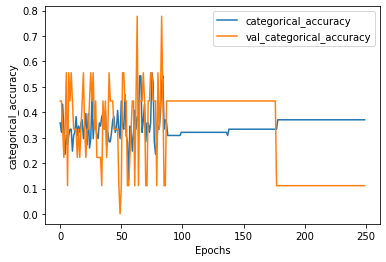

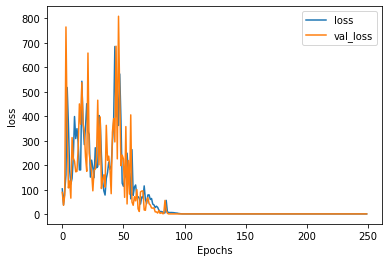

In [40]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultLSTM.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default LSTM 128

In [23]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 4s 393ms/step - loss: 23.6797 - categorical_accuracy: 0.4815 - val_loss: 140.7762 - val_categorical_accuracy: 0.4444
Epoch 2/250
3/3 [==============================] - 1s 175ms/step - loss: 69.4310 - categorical_accuracy: 0.3704 - val_loss: 29.1148 - val_categorical_accuracy: 0.3333
Epoch 3/250
3/3 [==============================] - 1s 211ms/step - loss: 71.6515 - categorical_accuracy: 0.3580 - val_loss: 26.9185 - val_categorical_accuracy: 0.3333
Epoch 4/250
3/3 [==============================] - 1s 184ms/step - loss: 57.9496 - categorical_accuracy: 0.3580 - val_loss: 31.9562 - val_categorical_accuracy: 0.7778
Epoch 5/250
3/3 [==============================] - 1s 165ms/step - loss: 78.2790 - categorical_accuracy: 0.2593 - val_loss: 75.3846 - val_categorical_accuracy: 0.3333
Epoch 6/250
3/3 [==============================] - 1s 173ms/step - loss: 82.5726 - categorical_accuracy: 0.3580 - val_loss: 63.2589 - val_categorical_accuracy: 0.55

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 128)           784896    
                                                                 
 lstm_16 (LSTM)              (None, 30, 128)           131584    
                                                                 
 lstm_17 (LSTM)              (None, 128)               131584    
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1,058,499
Trainable params: 1,058,499
No

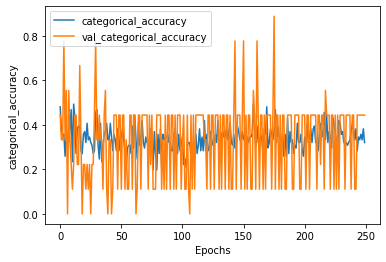

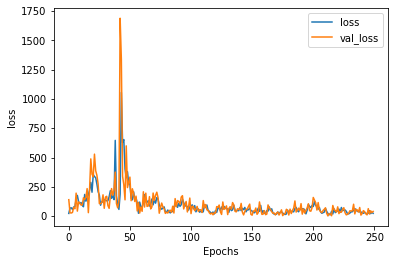

In [24]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultLSTM.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default LSTM 128 - 64(3)

In [25]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 4s 414ms/step - loss: 13.4674 - categorical_accuracy: 0.3210 - val_loss: 55.6026 - val_categorical_accuracy: 0.1111
Epoch 2/250
3/3 [==============================] - 1s 180ms/step - loss: 36.3321 - categorical_accuracy: 0.2469 - val_loss: 37.6601 - val_categorical_accuracy: 0.3333
Epoch 3/250
3/3 [==============================] - 1s 184ms/step - loss: 64.4339 - categorical_accuracy: 0.3333 - val_loss: 207.2039 - val_categorical_accuracy: 0.3333
Epoch 4/250
3/3 [==============================] - 1s 176ms/step - loss: 128.8531 - categorical_accuracy: 0.3086 - val_loss: 128.0650 - val_categorical_accuracy: 0.3333
Epoch 5/250
3/3 [==============================] - 1s 171ms/step - loss: 108.9851 - categorical_accuracy: 0.3704 - val_loss: 297.9050 - val_categorical_accuracy: 0.1111
Epoch 6/250
3/3 [==============================] - 1s 188ms/step - loss: 135.6715 - categorical_accuracy: 0.3210 - val_loss: 287.3092 - val_categorical_accuracy

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30, 128)           784896    
                                                                 
 lstm_19 (LSTM)              (None, 30, 128)           131584    
                                                                 
 lstm_20 (LSTM)              (None, 64)                49408     
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 3)                 99        
                                                                 
Total params: 972,227
Trainable params: 972,227
Non-tr

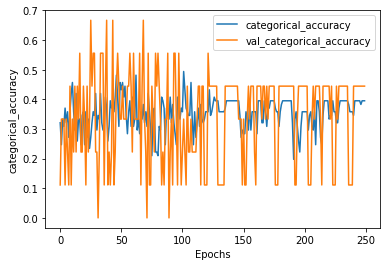

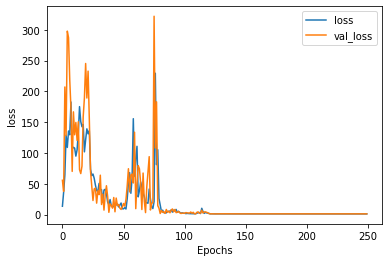

In [26]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultLSTM.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default LSTM 128(1) - 64

In [27]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 5s 704ms/step - loss: 139.1308 - categorical_accuracy: 0.3210 - val_loss: 124.9983 - val_categorical_accuracy: 0.3333
Epoch 2/250
3/3 [==============================] - 1s 353ms/step - loss: 98.3736 - categorical_accuracy: 0.3333 - val_loss: 20.4597 - val_categorical_accuracy: 0.6667
Epoch 3/250
3/3 [==============================] - 1s 373ms/step - loss: 22.3224 - categorical_accuracy: 0.3951 - val_loss: 9.8828 - val_categorical_accuracy: 0.3333
Epoch 4/250
3/3 [==============================] - 1s 329ms/step - loss: 6.8078 - categorical_accuracy: 0.3210 - val_loss: 27.1931 - val_categorical_accuracy: 0.4444
Epoch 5/250
3/3 [==============================] - 1s 410ms/step - loss: 12.7089 - categorical_accuracy: 0.4938 - val_loss: 14.7142 - val_categorical_accuracy: 0.6667
Epoch 6/250
3/3 [==============================] - 1s 358ms/step - loss: 19.9804 - categorical_accuracy: 0.3580 - val_loss: 37.3978 - val_categorical_accuracy: 0.333

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 30, 128)           784896    
                                                                 
 lstm_22 (LSTM)              (None, 30, 64)            49408     
                                                                 
 lstm_23 (LSTM)              (None, 64)                33024     
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 3)                 99        
                                                                 
Total params: 873,667
Trainable params: 873,667
Non-tr

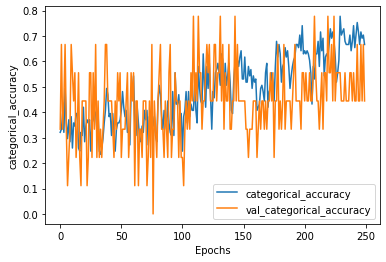

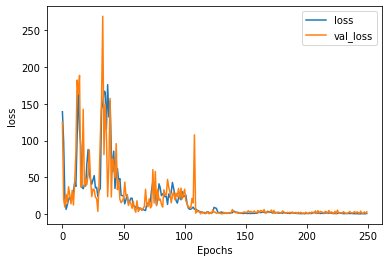

In [28]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultLSTM.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default LSTM 64 - 128(2) - 64


In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 5s 648ms/step - loss: 53.1173 - categorical_accuracy: 0.3210 - val_loss: 34.4397 - val_categorical_accuracy: 0.4444
Epoch 2/250
3/3 [==============================] - 1s 367ms/step - loss: 33.3276 - categorical_accuracy: 0.3580 - val_loss: 35.6385 - val_categorical_accuracy: 0.3333
Epoch 3/250
3/3 [==============================] - 1s 438ms/step - loss: 78.9177 - categorical_accuracy: 0.3210 - val_loss: 178.6182 - val_categorical_accuracy: 0.3333
Epoch 4/250
3/3 [==============================] - 1s 408ms/step - loss: 219.2263 - categorical_accuracy: 0.3086 - val_loss: 142.4845 - val_categorical_accuracy: 0.1111
Epoch 5/250
3/3 [==============================] - 0s 167ms/step - loss: 181.9749 - categorical_accuracy: 0.2716 - val_loss: 124.9774 - val_categorical_accuracy: 0.4444
Epoch 6/250
3/3 [==============================] - 1s 186ms/step - loss: 104.2992 - categorical_accuracy: 0.2840 - val_loss: 77.1425 - val_categorical_accuracy:

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 30, 64)            376064    
                                                                 
 lstm_43 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_44 (LSTM)              (None, 64)                49408     
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 3)                 99        
                                                                 
Total params: 530,627
Trainable params: 530,627
Non-t

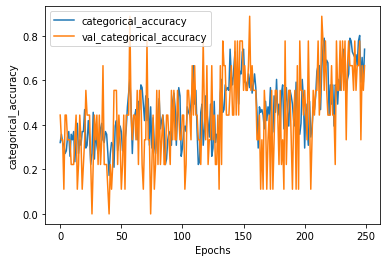

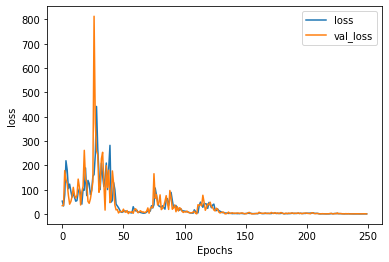

In [42]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultLSTM.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default LSTM 64

In [31]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 4s 407ms/step - loss: 76.5121 - categorical_accuracy: 0.3210 - val_loss: 319.9210 - val_categorical_accuracy: 0.1111
Epoch 2/250
3/3 [==============================] - 1s 332ms/step - loss: 192.4919 - categorical_accuracy: 0.3457 - val_loss: 66.4319 - val_categorical_accuracy: 0.4444
Epoch 3/250
3/3 [==============================] - 2s 887ms/step - loss: 44.5470 - categorical_accuracy: 0.3457 - val_loss: 37.3757 - val_categorical_accuracy: 0.1111
Epoch 4/250
3/3 [==============================] - 1s 380ms/step - loss: 16.4349 - categorical_accuracy: 0.2593 - val_loss: 14.1034 - val_categorical_accuracy: 0.4444
Epoch 5/250
3/3 [==============================] - 1s 400ms/step - loss: 16.6160 - categorical_accuracy: 0.2840 - val_loss: 2.9449 - val_categorical_accuracy: 0.4444
Epoch 6/250
3/3 [==============================] - 1s 426ms/step - loss: 10.3137 - categorical_accuracy: 0.3457 - val_loss: 3.2488 - val_categorical_accuracy: 0.444

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 30, 64)            376064    
                                                                 
 lstm_28 (LSTM)              (None, 30, 64)            33024     
                                                                 
 lstm_29 (LSTM)              (None, 64)                33024     
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 3)                 99        
                                                                 
Total params: 448,451
Trainable params: 448,451
Non-tr

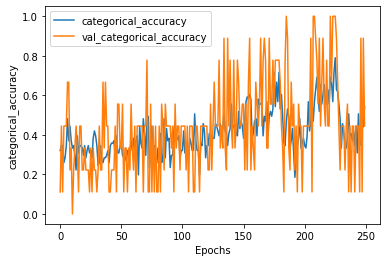

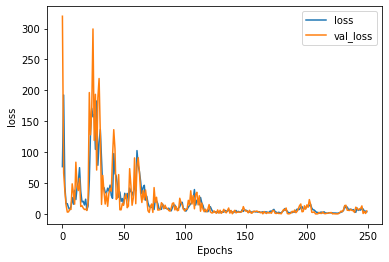

In [32]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultLSTM.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default LSTM 64 - 128(3)

In [33]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 7s 400ms/step - loss: 19.0180 - categorical_accuracy: 0.3086 - val_loss: 27.3363 - val_categorical_accuracy: 0.4444
Epoch 2/250
3/3 [==============================] - 1s 266ms/step - loss: 21.4785 - categorical_accuracy: 0.4198 - val_loss: 17.9189 - val_categorical_accuracy: 0.4444
Epoch 3/250
3/3 [==============================] - 1s 431ms/step - loss: 20.1312 - categorical_accuracy: 0.2963 - val_loss: 26.4700 - val_categorical_accuracy: 0.5556
Epoch 4/250
3/3 [==============================] - 1s 189ms/step - loss: 55.0323 - categorical_accuracy: 0.3457 - val_loss: 23.1324 - val_categorical_accuracy: 0.2222
Epoch 5/250
3/3 [==============================] - 1s 269ms/step - loss: 67.6262 - categorical_accuracy: 0.2716 - val_loss: 61.7275 - val_categorical_accuracy: 0.2222
Epoch 6/250
3/3 [==============================] - 1s 270ms/step - loss: 141.4388 - categorical_accuracy: 0.2716 - val_loss: 181.0570 - val_categorical_accuracy: 0.4

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 30, 64)            376064    
                                                                 
 lstm_31 (LSTM)              (None, 30, 64)            33024     
                                                                 
 lstm_32 (LSTM)              (None, 128)               98816     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 3)                 99        
                                                                 
Total params: 518,339
Trainable params: 518,339
Non-t

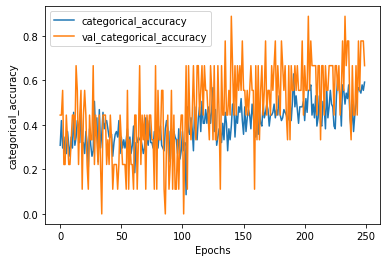

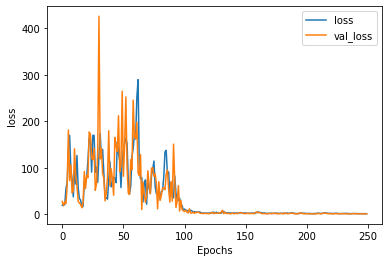

In [34]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultLSTM.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default LSTM 64(1) - 128

In [35]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 3s 393ms/step - loss: 40.0043 - categorical_accuracy: 0.3580 - val_loss: 23.4346 - val_categorical_accuracy: 0.3333
Epoch 2/250
3/3 [==============================] - 1s 178ms/step - loss: 21.1721 - categorical_accuracy: 0.3333 - val_loss: 35.2050 - val_categorical_accuracy: 0.1111
Epoch 3/250
3/3 [==============================] - 1s 198ms/step - loss: 59.0680 - categorical_accuracy: 0.3580 - val_loss: 122.4826 - val_categorical_accuracy: 0.2222
Epoch 4/250
3/3 [==============================] - 1s 339ms/step - loss: 94.3369 - categorical_accuracy: 0.3951 - val_loss: 81.9899 - val_categorical_accuracy: 0.3333
Epoch 5/250
3/3 [==============================] - 1s 364ms/step - loss: 64.4828 - categorical_accuracy: 0.3210 - val_loss: 33.9689 - val_categorical_accuracy: 0.3333
Epoch 6/250
3/3 [==============================] - 1s 403ms/step - loss: 44.8963 - categorical_accuracy: 0.3580 - val_loss: 49.5067 - val_categorical_accuracy: 0.44

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 30, 64)            376064    
                                                                 
 lstm_34 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_35 (LSTM)              (None, 128)               131584    
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 3)                 99        
                                                                 
Total params: 616,899
Trainable params: 616,899
Non-t

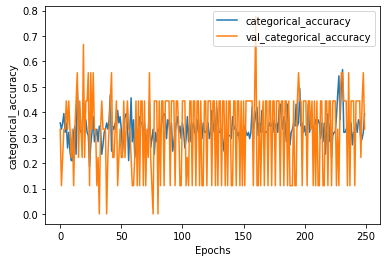

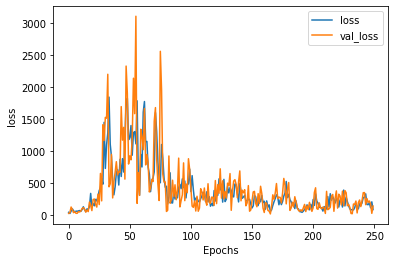

In [36]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultLSTM.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default LSTM 128 - 64(2) - 128


In [37]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 4s 411ms/step - loss: 666.2495 - categorical_accuracy: 0.3333 - val_loss: 18.4124 - val_categorical_accuracy: 0.6667
Epoch 2/250
3/3 [==============================] - 1s 206ms/step - loss: 157.3900 - categorical_accuracy: 0.3333 - val_loss: 43.8325 - val_categorical_accuracy: 0.2222
Epoch 3/250
3/3 [==============================] - 1s 177ms/step - loss: 192.3181 - categorical_accuracy: 0.2963 - val_loss: 341.1969 - val_categorical_accuracy: 0.2222
Epoch 4/250
3/3 [==============================] - 0s 173ms/step - loss: 302.2385 - categorical_accuracy: 0.3704 - val_loss: 64.4641 - val_categorical_accuracy: 0.5556
Epoch 5/250
3/3 [==============================] - 1s 191ms/step - loss: 89.4198 - categorical_accuracy: 0.3580 - val_loss: 154.5844 - val_categorical_accuracy: 0.2222
Epoch 6/250
3/3 [==============================] - 1s 342ms/step - loss: 119.3210 - categorical_accuracy: 0.2840 - val_loss: 150.7534 - val_categorical_accurac

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 30, 64)            376064    
                                                                 
 lstm_37 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_38 (LSTM)              (None, 64)                49408     
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 3)                 99        
                                                                 
Total params: 530,627
Trainable params: 530,627
Non-t

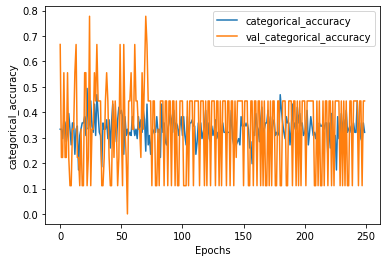

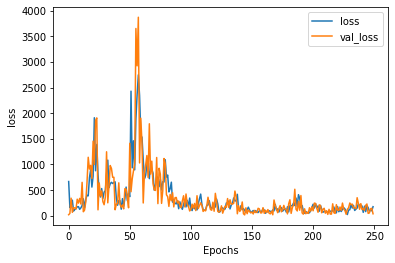

In [38]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultLSTM.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')